In [7]:
import pandas as pd
import pyodbc

# Connect to SQL server and extract data
conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=johndroescher.com;"
    "DATABASE=Sum_2024;"
    "UID=mdislam812;"
    "PWD=CCny23859812;"
    "Connection Timeout=90;"
)

cnxn = pyodbc.connect(conn_str)

# Extract data into dataframes
sales_data = pd.read_sql("SELECT * FROM dbo.proj_sales", cnxn)
products_data = pd.read_sql("SELECT * FROM dbo.proj_products", cnxn)
exchange_rates = pd.read_sql("SELECT * FROM dbo.proj_exchange_rates", cnxn)
stores_data = pd.read_sql("SELECT * FROM dbo.proj_stores", cnxn)

cnxn.close()

# Merge sales data with product and store data
sales_data = sales_data.merge(products_data, on='ProductKey', how='left')
sales_data = sales_data.merge(stores_data, on='StoreKey', how='left')

# Convert order and delivery dates to datetime
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'])
sales_data['Delivery_Date'] = pd.to_datetime(sales_data['Delivery_Date'], errors='coerce')

# Calculate total sales value and profit for each order
sales_data['Total_Sales_Value'] = sales_data['Quantity'] * sales_data['Unit_Price_USD']
sales_data['Total_Cost_Value'] = sales_data['Quantity'] * sales_data['Unit_Cost_USD']
sales_data['Profit'] = sales_data['Total_Sales_Value'] - sales_data['Total_Cost_Value']

# Convert sales value to USD using exchange rates
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])
sales_data = sales_data.merge(exchange_rates, left_on=['Order_Date', 'Currency_Code'], right_on=['Date', 'Currency'], how='left')
sales_data['Total_Sales_Value_USD'] = sales_data['Total_Sales_Value'] * sales_data['Exchange']
sales_data['Profit_USD'] = sales_data['Profit'] * sales_data['Exchange']


/var/folders/v_/m8ss3j1j0t3bx31wfv39d3_80000gn/T/ipykernel_3533/114526537.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql("SELECT * FROM dbo.proj_sales", cnxn)
/var/folders/v_/m8ss3j1j0t3bx31wfv39d3_80000gn/T/ipykernel_3533/114526537.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_data = pd.read_sql("SELECT * FROM dbo.proj_products", cnxn)
/var/folders/v_/m8ss3j1j0t3bx31wfv39d3_80000gn/T/ipykernel_3533/114526537.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exchange_rates =

In [8]:
# Sales by Product
sales_by_product = sales_data.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False)
sales_by_product.head(10)

Product_Name
WWI Desktop PC2.33 X2330 Black                550
WWI Desktop PC1.80 E1800 White                538
Adventure Works Desktop PC1.60 ED160 Black    521
Adventure Works Desktop PC2.30 MD230 White    521
Adventure Works Desktop PC1.80 ED180 Black    520
Adventure Works Desktop PC2.30 MD230 Black    514
WWI Desktop PC1.60 E1600 Black                509
WWI Desktop PC1.60 E1600 Silver               507
Adventure Works Desktop PC1.60 ED160 White    505
WWI Desktop PC1.60 E1600 Red                  505
Name: Quantity, dtype: int64

In [9]:
# Sales by Region
sales_by_region = sales_data.groupby('State')['Quantity'].sum().sort_values(ascending=False)
sales_by_region.head(10)

State
Online                   41311
Northwest Territories     4894
Nevada                    4826
Kansas                    4773
South Carolina            4771
Nebraska                  4686
Oregon                    4674
Connecticut               4672
Arkansas                  4581
West Virginia             4524
Name: Quantity, dtype: int64

<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Month', ylabel='Total Quantity Sold'>

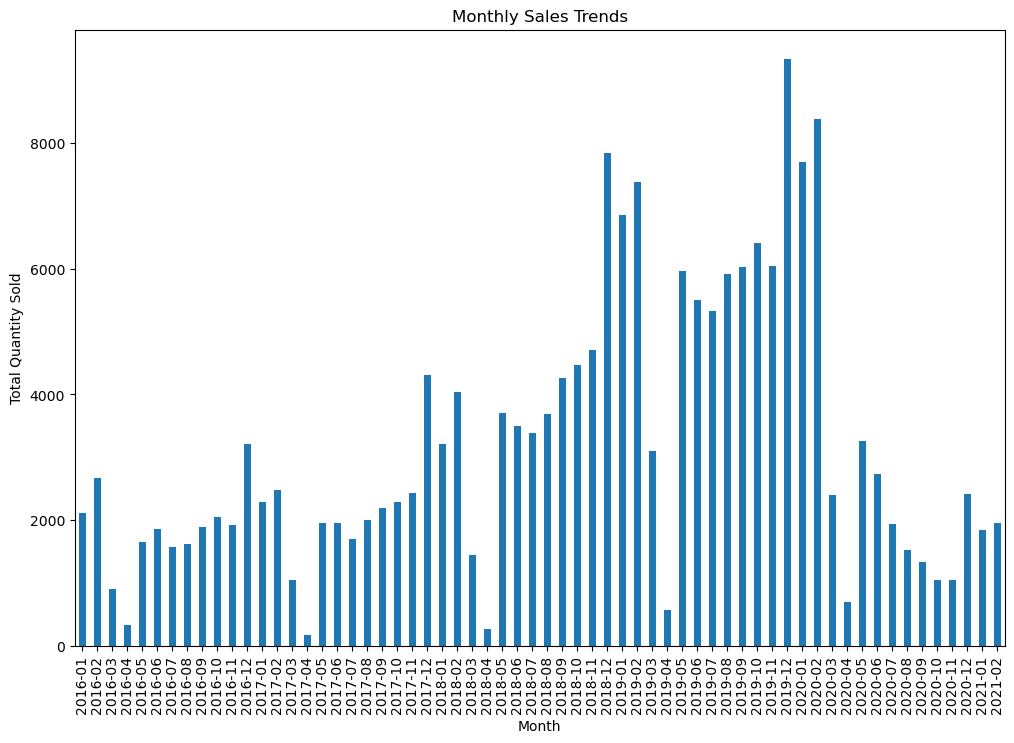

In [10]:
# Monthly Sales Trends
monthly_sales = sales_data.groupby(sales_data['Order_Date'].dt.to_period('M'))['Quantity'].sum()
monthly_sales.plot(kind='bar', figsize=(12, 8), title='Monthly Sales Trends', xlabel='Month', ylabel='Total Quantity Sold')

In [11]:
# Profit Analysis
profit_by_product = sales_data.groupby('Product_Name')['Profit_USD'].sum().sort_values(ascending=False)
profit_by_product.head(10)

profit_by_region = sales_data.groupby('State')['Profit_USD'].sum().sort_values(ascending=False)
profit_by_region.head(10)

State
Online                       6.536642e+06
Northwest Territories        1.002360e+06
Newfoundland and Labrador    9.023706e+05
Nevada                       8.091541e+05
Kansas                       8.004012e+05
Nunavut                      7.889565e+05
Nebraska                     7.824831e+05
Oregon                       7.504228e+05
Connecticut                  7.484332e+05
South Carolina               7.457393e+05
Name: Profit_USD, dtype: float64

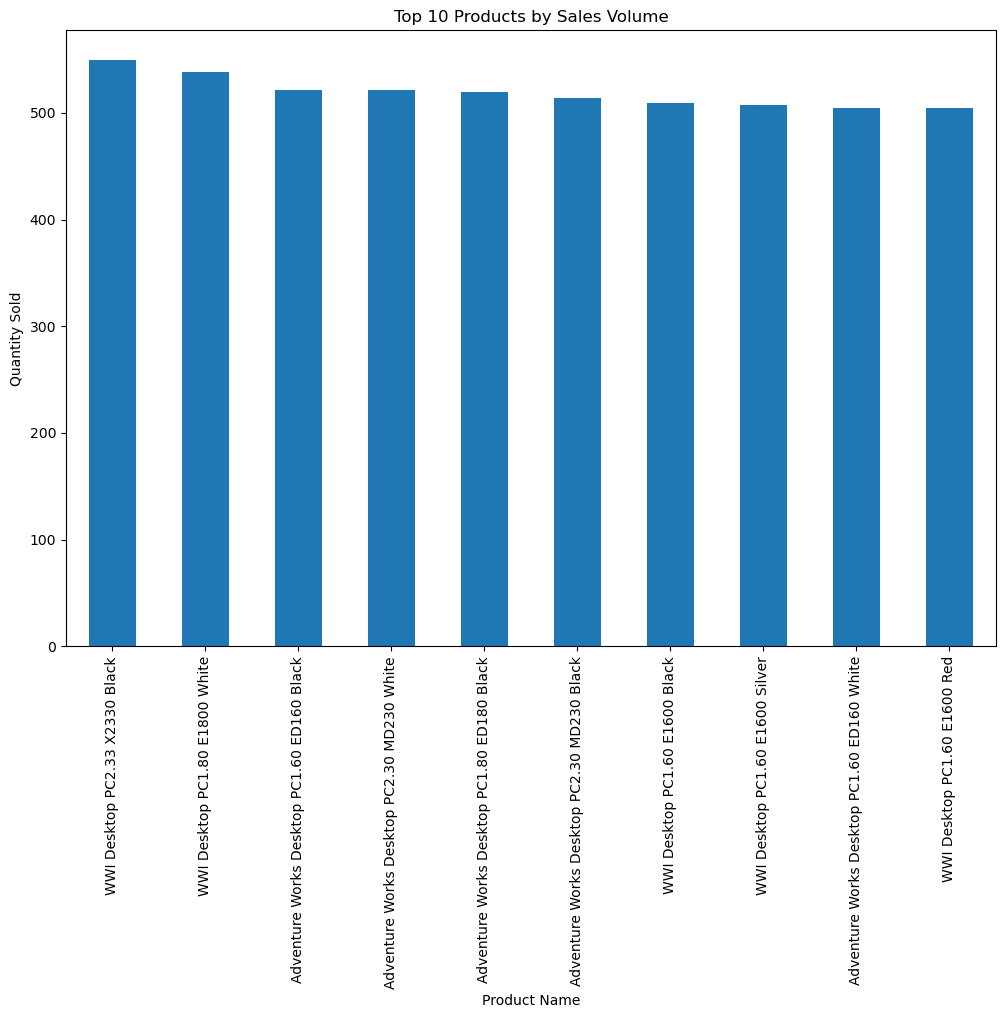

In [12]:
import matplotlib.pyplot as plt

# Plot Top 10 Products by Sales Volume
top_10_products = sales_by_product.head(10)
top_10_products.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

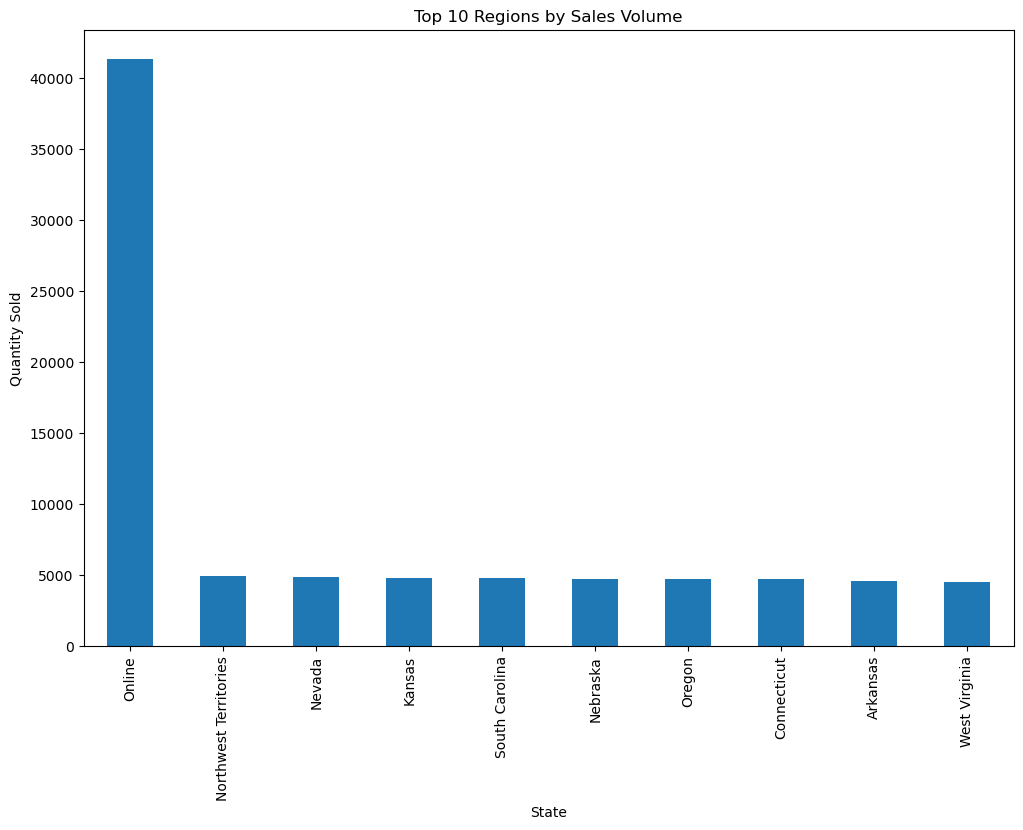

In [13]:
# Plot Top 10 Regions by Sales Volume
top_10_regions = sales_by_region.head(10)
top_10_regions.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Regions by Sales Volume')
plt.xlabel('State')
plt.ylabel('Quantity Sold')
plt.show()

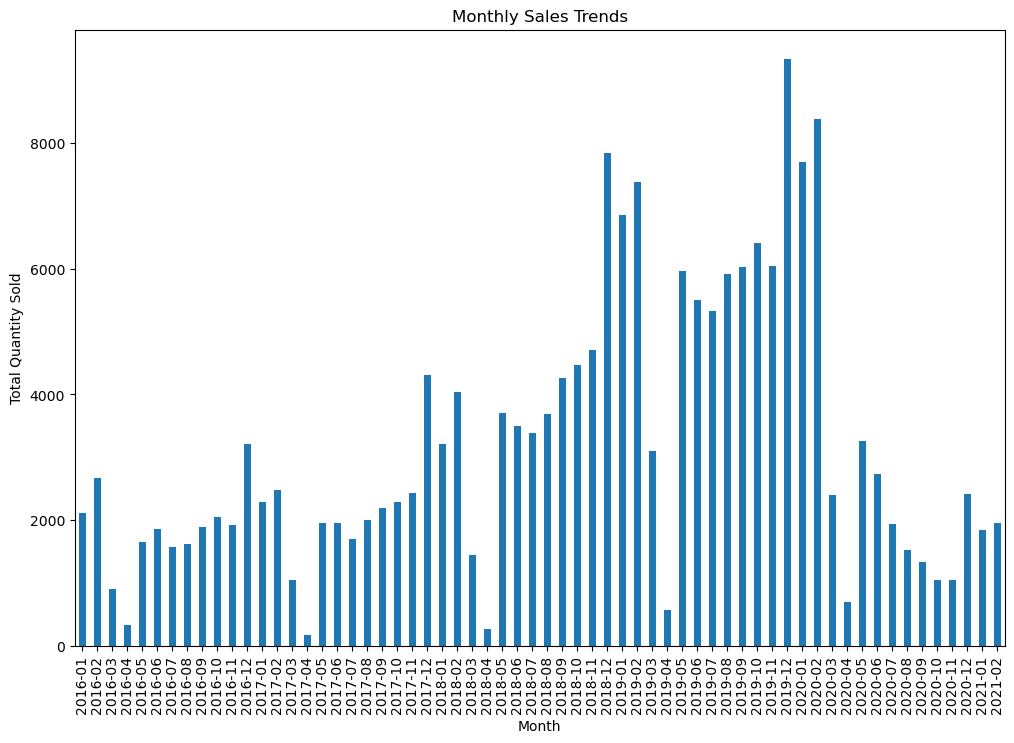

In [14]:
# Plot Monthly Sales Trends
monthly_sales.plot(kind='bar', figsize=(12, 8))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

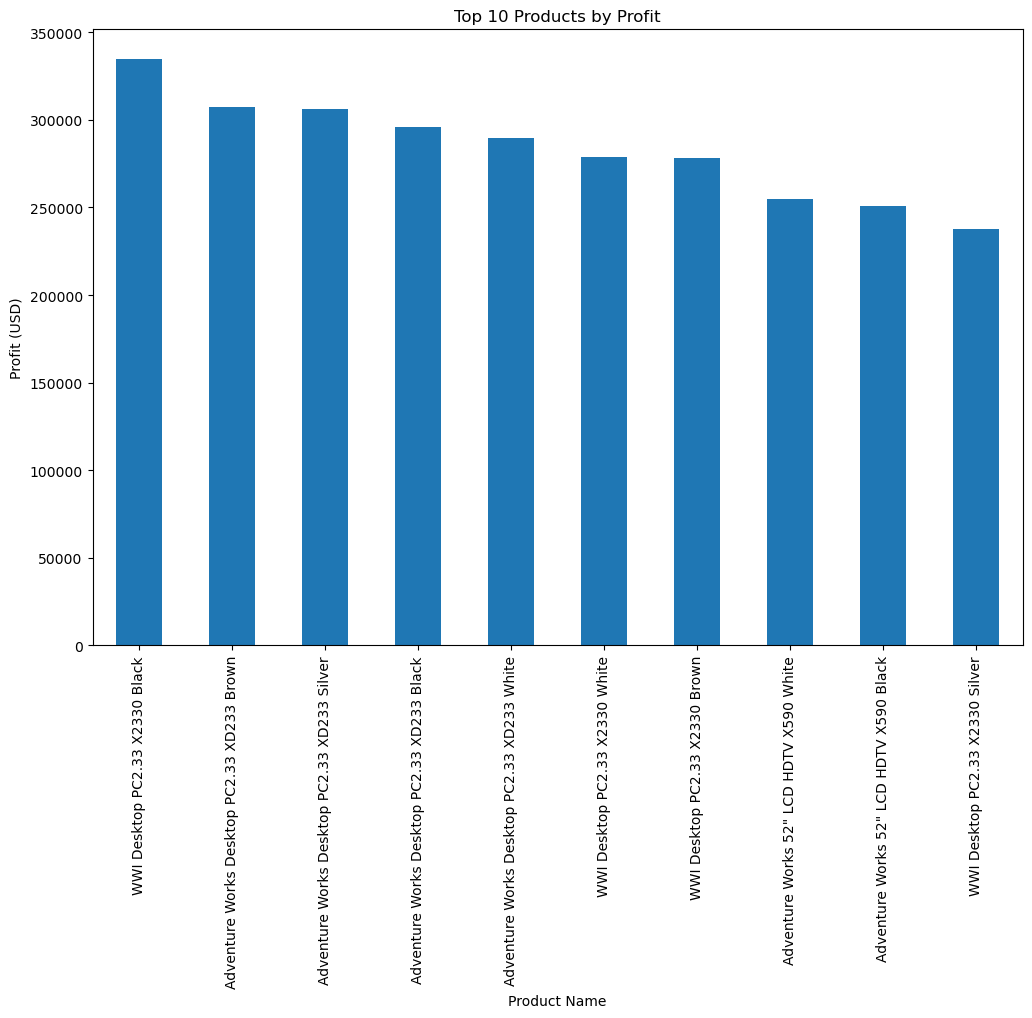

In [15]:
# Plot Top 10 Products by Profit
top_10_products_profit = profit_by_product.head(10)
top_10_products_profit.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Products by Profit')
plt.xlabel('Product Name')
plt.ylabel('Profit (USD)')
plt.show()

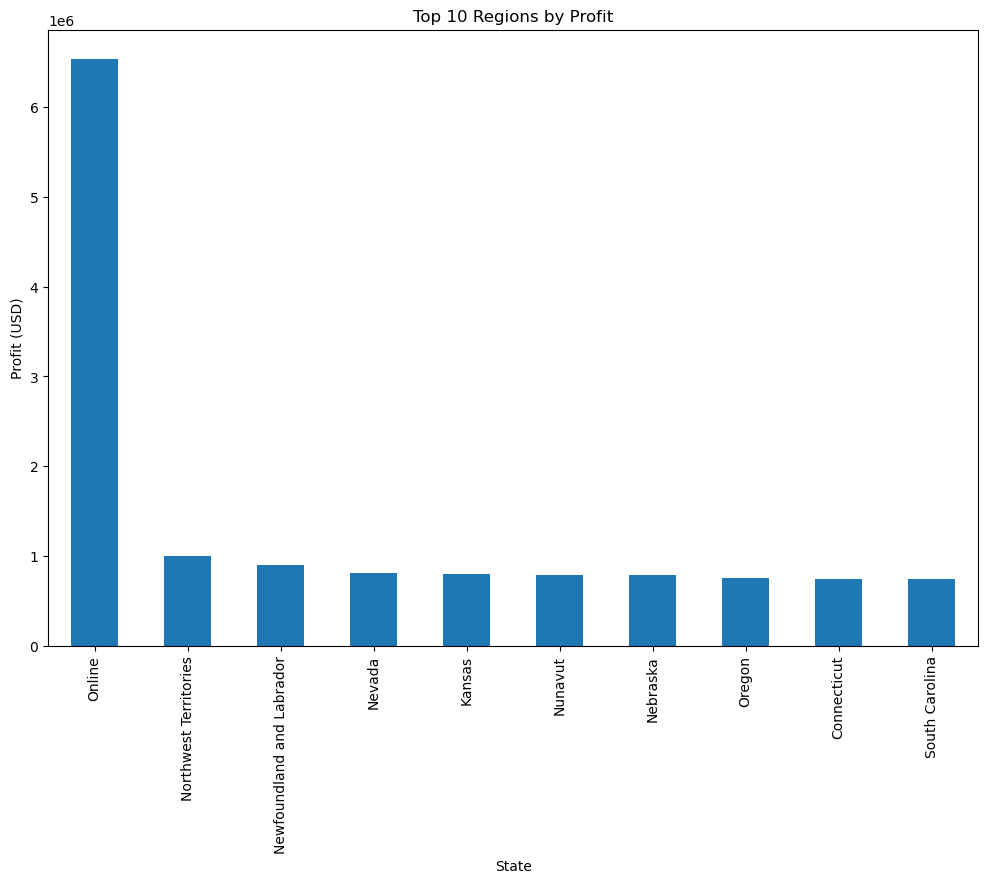

In [16]:
# Plot Top 10 Regions by Profit
top_10_regions_profit = profit_by_region.head(10)
top_10_regions_profit.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Regions by Profit')
plt.xlabel('State')
plt.ylabel('Profit (USD)')
plt.show()

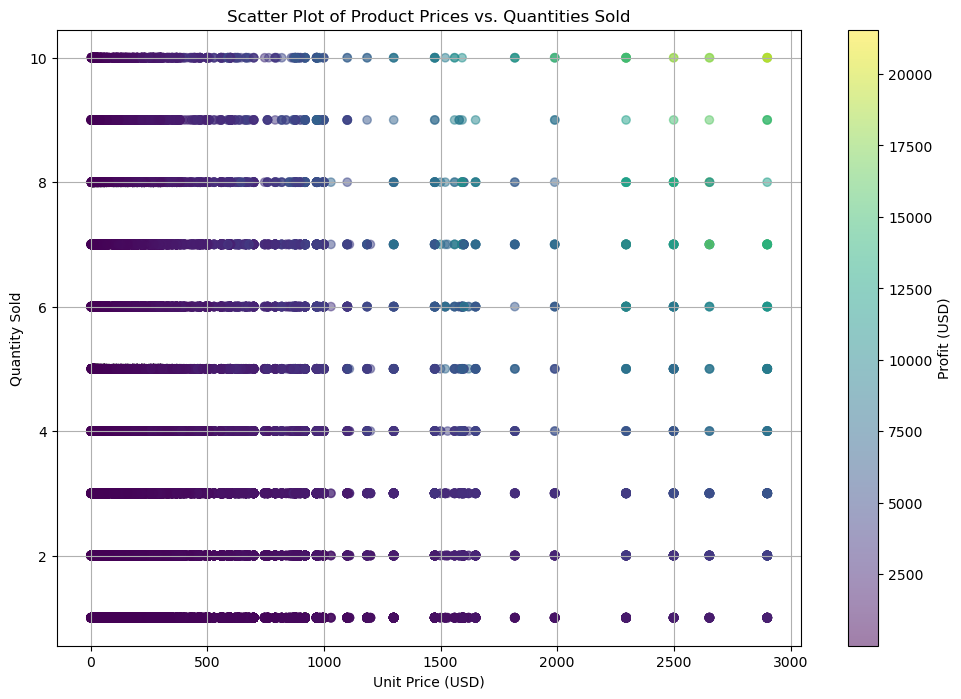

In [18]:
# Scatter plot to compare product prices and quantities sold
plt.figure(figsize=(12, 8))
plt.scatter(sales_data['Unit_Price_USD'], sales_data['Quantity'], alpha=0.5, c=sales_data['Profit_USD'], cmap='viridis')
plt.colorbar(label='Profit (USD)')
plt.title('Scatter Plot of Product Prices vs. Quantities Sold')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()